In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
chartevents = pd.read_csv("/content/drive/MyDrive/DA_dataset/6hour_chartevents.csv")
patients = pd.read_csv("/content/drive/MyDrive/DA_dataset/patients_icu.csv")
d_items = pd.read_csv("/content/drive/MyDrive/DA_dataset/d_items.csv")
icustays = pd.read_csv("/content/drive/MyDrive/DA_dataset/icustays.csv")
diagnoses = pd.read_csv("/content/drive/MyDrive/DA_dataset/diagnoses_icd.csv")
d_icd = pd.read_csv("/content/drive/MyDrive/DA_dataset/d_icd_diagnoses.csv")

print(chartevents.shape)
print(patients.shape)
print(d_items.shape)
print(icustays.shape)
print(diagnoses.shape)
print(d_icd.shape)

# 데이터 로드

<ipython-input-4-77f3a41f1bb4>:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  chartevents = pd.read_csv("/content/drive/MyDrive/DA_dataset/6hour_chartevents.csv")


(29979882, 12)
(8971, 16)
(3861, 9)
(76540, 8)
(5280351, 5)
(109775, 3)


In [ ]:
chartevents_m = pd.merge(chartevents,d_items, on = 'itemid')
#이벤트의 이름 확인을 위해 d_items와 병합

In [ ]:
# 화씨를 측정한 이벤트는 섭씨로 변환함 -> 섭씨를 측정한 이벤트 사용
chartevents_m.loc[chartevents_m['label'] == 'Temperature Fahrenheit','valuenum'] = chartevents_m.loc[chartevents_m['label'] == 'Temperature Fahrenheit','valuenum'].map(lambda x : (x - 32) * 5.0 / 9.0)
chartevents_m.loc[chartevents_m['label'] == 'Temperature Fahrenheit','valuenum']
# 아래는 변환 결과

,valuenum
44,36.555556
802,36.611111
883,36.611111
930,36.944444
1028,36.944444
...,...
27539231,36.611111
27539328,36.666667
27539383,37.277778
27539506,36.055556


In [ ]:
i = icustays['hadm_id']
diagnose_icu = diagnoses[diagnoses['hadm_id'].isin(i)]
first_diagnose_table = diagnose_icu[diagnose_icu['seq_num'] == 1]
# seq_num이 1인 진단을 기준으로 그룹화
infectious = first_diagnose_table[first_diagnose_table['icd_code'].isin(['B02','0389','03842','A419','A3151','A4189'])]

id = infectious['hadm_id'] # 감염성(패혈증) 질병을 갖는 환자들의 id 추출

In [ ]:
chartevents_m = chartevents_m[chartevents_m['hadm_id'].isin(id)]
chartevents_m # 감염성 질환만 갖는 환자로 구성된 chartevents_events

,subject_id,hadm_id,stay_id,charttime,storetime,itemid,value,valuenum,valueuom,warning,intime,endtime,label,abbreviation,linksto,category,unitname,param_type,lownormalvalue,highnormalvalue
99,10004235,24181354,34100191,2196-02-24 17:09:00,2196-02-24 17:48:00,220277,94.0,94.0,%,0,2196-02-24 17:07:00,2196-02-24 23:07:00,O2 saturation pulseoxymetry,SpO2,chartevents,Respiratory,%,Numeric,NaN,NaN
100,10004235,24181354,34100191,2196-02-24 17:15:00,2196-02-24 17:16:00,220046,160.0,160.0,bpm,0,2196-02-24 17:07:00,2196-02-24 23:07:00,Heart rate Alarm - High,HR Alarm - High,chartevents,Alarms,bpm,Numeric,NaN,NaN
101,10004235,24181354,34100191,2196-02-24 17:15:00,2196-02-24 17:16:00,220047,50.0,50.0,bpm,0,2196-02-24 17:07:00,2196-02-24 23:07:00,Heart Rate Alarm - Low,HR Alarm - Low,chartevents,Alarms,bpm,Numeric,NaN,NaN
102,10004235,24181354,34100191,2196-02-24 17:15:00,2196-02-24 17:16:00,220056,60.0,60.0,mmHg,0,2196-02-24 17:07:00,2196-02-24 23:07:00,Arterial Blood Pressure Alarm - Low,ABP Alarm - Low,chartevents,Alarms,mmHg,Numeric,NaN,NaN
103,10004235,24181354,34100191,2196-02-24 17:15:00,2196-02-24 17:16:00,220058,110.0,110.0,mmHg,0,2196-02-24 17:07:00,2196-02-24 23:07:00,Arterial Blood Pressure Alarm - High,ABP Alarm - High,chartevents,Alarms,mmHg,Numeric,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29978854,19992202,20329411,36409124,2153-02-27 02:00:00,2153-02-27 01:34:00,224086,Tolerated Well,NaN,NaN,0,2153-02-26 20:47:12,2153-02-27 02:47:12,Activity Tolerance,Activity Tolerance,chartevents,Treatments,NaN,Text,NaN,NaN
29978855,19992202,20329411,36409124,2153-02-27 02:00:00,2153-02-27 01:34:00,224093,Rotating,NaN,NaN,0,2153-02-26 20:47:12,2153-02-27 02:47:12,Position,Position,chartevents,Treatments,NaN,Text,NaN,NaN
29978856,19992202,20329411,36409124,2153-02-27 02:00:00,2153-02-27 03:04:00,224650,NaN,NaN,NaN,0,2153-02-26 20:47:12,2153-02-27 02:47:12,Ectopy Type 1,Ectopy Type 1,chartevents,Routine Vital Signs,NaN,Text,NaN,NaN
29978857,19992202,20329411,36409124,2153-02-27 02:00:00,2153-02-27 03:35:00,228393,Other,NaN,NaN,0,2153-02-26 20:47:12,2153-02-27 02:47:12,Bath,Bath,chartevents,Treatments,NaN,Text,NaN,NaN


In [ ]:
# chartevents_m에서 필요한 열만 뽑은 chart
chart = chartevents_m[['subject_id','stay_id','charttime','itemid','value','valuenum',"valueuom",'intime','label']]
chart

,subject_id,stay_id,charttime,itemid,value,valuenum,valueuom,intime,label
99,10004235,34100191,2196-02-24 17:09:00,220277,94.0,94.0,%,2196-02-24 17:07:00,O2 saturation pulseoxymetry
100,10004235,34100191,2196-02-24 17:15:00,220046,160.0,160.0,bpm,2196-02-24 17:07:00,Heart rate Alarm - High
101,10004235,34100191,2196-02-24 17:15:00,220047,50.0,50.0,bpm,2196-02-24 17:07:00,Heart Rate Alarm - Low
102,10004235,34100191,2196-02-24 17:15:00,220056,60.0,60.0,mmHg,2196-02-24 17:07:00,Arterial Blood Pressure Alarm - Low
103,10004235,34100191,2196-02-24 17:15:00,220058,110.0,110.0,mmHg,2196-02-24 17:07:00,Arterial Blood Pressure Alarm - High
...,...,...,...,...,...,...,...,...,...
29978854,19992202,36409124,2153-02-27 02:00:00,224086,Tolerated Well,NaN,NaN,2153-02-26 20:47:12,Activity Tolerance
29978855,19992202,36409124,2153-02-27 02:00:00,224093,Rotating,NaN,NaN,2153-02-26 20:47:12,Position
29978856,19992202,36409124,2153-02-27 02:00:00,224650,NaN,NaN,NaN,2153-02-26 20:47:12,Ectopy Type 1
29978857,19992202,36409124,2153-02-27 02:00:00,228393,Other,NaN,NaN,2153-02-26 20:47:12,Bath


In [ ]:
icustays['los'].describe()

,los
count,76540.000000
mean,3.472210
std,5.173846
min,0.001250
25%,1.087002
50%,1.931973
75%,3.727242
max,375.944560


In [ ]:
icustays = icustays[~((icustays['los'] >  13.74) | (icustays['los'] < 0.25))]
stay_id = icustays['stay_id']
#12시간보다 빨리 퇴원하거나, 입실기간이 2표준편차 이상인 이상치 제거
chart = chart[chart['stay_id'].isin(stay_id)]
chart

,subject_id,stay_id,charttime,itemid,value,valuenum,valueuom,intime,label
99,10004235,34100191,2196-02-24 17:09:00,220277,94.0,94.0,%,2196-02-24 17:07:00,O2 saturation pulseoxymetry
100,10004235,34100191,2196-02-24 17:15:00,220046,160.0,160.0,bpm,2196-02-24 17:07:00,Heart rate Alarm - High
101,10004235,34100191,2196-02-24 17:15:00,220047,50.0,50.0,bpm,2196-02-24 17:07:00,Heart Rate Alarm - Low
102,10004235,34100191,2196-02-24 17:15:00,220056,60.0,60.0,mmHg,2196-02-24 17:07:00,Arterial Blood Pressure Alarm - Low
103,10004235,34100191,2196-02-24 17:15:00,220058,110.0,110.0,mmHg,2196-02-24 17:07:00,Arterial Blood Pressure Alarm - High
...,...,...,...,...,...,...,...,...,...
29978854,19992202,36409124,2153-02-27 02:00:00,224086,Tolerated Well,NaN,NaN,2153-02-26 20:47:12,Activity Tolerance
29978855,19992202,36409124,2153-02-27 02:00:00,224093,Rotating,NaN,NaN,2153-02-26 20:47:12,Position
29978856,19992202,36409124,2153-02-27 02:00:00,224650,NaN,NaN,NaN,2153-02-26 20:47:12,Ectopy Type 1
29978857,19992202,36409124,2153-02-27 02:00:00,228393,Other,NaN,NaN,2153-02-26 20:47:12,Bath


In [ ]:
# 이벤트 그룹 정의 -> 각 측정할 값에 해당하는 이벤트들
hr_events = ["Heart Rate","Heart rate Alarm - High","Heart Rate Alarm - Low"]
systolic_bp_events = ["Arterial Blood Pressure systolic", "ART BP Systolic","Non Invasive Blood Pressure systolic"]
diastolic_bp_events = ['Arterial Blood Pressure diastolic', 'ART BP Diastolic','Non Invasive Blood Pressure diastolic']
Blood_Glucose = ["Glucose (serum)","Glucose (whole blood)",'Glucose finger stick (range 70-100)']
O2_Saturation_Pulseoxymetry = ["O2 saturation pulseoxymetry"]
temperature = ["Temperature Fahrenheit","Temperature Celsius"]
Respiratory_Rate =['Respiratory Rate']
PH = ['PH (Arterial)','PH (Venous)']
GCS_Eye = ['GCS - Eye Opening']
GCS_Verbal = ['GCS - Verbal Response']
GCS_Motor = ['GCS - Motor Response']
LacticAcid = ['Lactic Acid']
WBC = ['WBC']

# 필터링할 이벤트만 있는 행 선택
filtered_df = chart[chart['label'].isin(hr_events + systolic_bp_events + diastolic_bp_events +
Blood_Glucose  + O2_Saturation_Pulseoxymetry + temperature + Respiratory_Rate + PH + GCS_Eye + GCS_Verbal + GCS_Motor + LacticAcid + WBC)].copy()

# intime 컬럼을 datetime 형식으로 변환 -> 시간 계산을 위해 변경
filtered_df['intime'] = pd.to_datetime(filtered_df['intime'])
filtered_df['charttime'] = pd.to_datetime(filtered_df['charttime'])

# 입실 후 시간 단위로 구분 -> 각 이벤트들을 1시간동안 이벤트인지, 2시간 동안 이벤트인지 설정하여 새로운 컬럼으로 만듬
filtered_df['time_since_admission'] = (filtered_df['charttime'] - filtered_df['intime']).dt.total_seconds() / 3600
filtered_df['time_bin'] = filtered_df['time_since_admission'].apply(lambda x: int(x) if x < 6 else 5)  # 0~5 구간으로 구성된 time bin

# 이벤트 그룹별 레이블 지정 함수
def get_event_group(label):
    if label in hr_events:
        return 'Heart Rate'
    elif label in systolic_bp_events:
        return 'Systolic BP'
    elif label in diastolic_bp_events:
        return 'Diastolic BP'
    elif label in Blood_Glucose:
        return 'Blood Glucose'
    elif label in O2_Saturation_Pulseoxymetry:
        return 'O2 Saturation Pulseoxymetry'
    elif label in temperature:
        return 'Temperature'
    elif label in Respiratory_Rate:
        return 'Respiratory Rate'
    elif label in PH:
        return 'Arterial PH'
    elif label in GCS_Eye:
        return 'GCS_Eye'
    elif label in GCS_Verbal:
        return 'GCS_Verbal'
    elif label in GCS_Motor:
        return 'GCS_Motor'
    elif label in LacticAcid:
        return 'Lactic Acid'
    elif label in WBC:
        return 'WBC'
    else:
        return 'Other'

# 그룹으로 분류하여 새로운 컬럼으로 만듦
filtered_df['event_group'] = filtered_df['label'].apply(get_event_group)

# 이상치 제거 함수 (각 이벤트를 가능한 범위에 따라 필터링 -> 사람에게서 측정될 수 없는 값은 제거되도록 함. 자료 적어둠)
def remove_outliers(df):
    conditions = (
        ((df['event_group'] == 'Heart Rate') & (df['valuenum'].between(0, 400))) |
        ((df['event_group'] == 'Systolic BP') & (df['valuenum'].between(0, 400))) |
        ((df['event_group'] == 'Diastolic BP') & (df['valuenum'].between(0, 300))) |
        ((df['event_group'] == 'Blood Glucose') & (df['valuenum'].between(0, 1500))) |
        ((df['event_group'] == 'ETCO2') & (df['valuenum'].between(0, 500))) |
        ((df['event_group'] == 'FIO2') & (df['valuenum'].between(0, 500))) |
        ((df['event_group'] == 'O2 Saturation Pulseoxymetry') & (df['valuenum'].between(0, 1000))) |
        ((df['event_group'] == 'Temperature') & (df['valuenum'].between(0, 50))) |
        ((df['event_group'] == 'Respiratory Rate') & (df['valuenum'].between(0, 1000))) |
        ((df['event_group'] == 'Arterial PH') & (df['valuenum'].between(0, 10))) |
        ((df['event_group'] == 'GCS_Eye') & (df['valuenum'].between(0, 4))) |
        ((df['event_group'] == 'GCS_Verbal') & (df['valuenum'].between(1, 5))) |
        ((df['event_group'] == 'GCS_Motor') & (df['valuenum'].between(1, 6))) |
        ((df['event_group'] == 'Lactic Acid') & (df['valuenum'].between(0, 100))) |
        ((df['event_group'] == 'WBC') & (df['valuenum'].between(0, 1000)))

    )
    return df[conditions]

# 이상치 제거 적용
filtered_df = remove_outliers(filtered_df)

# 시간 구간을 기준으로 그룹화하고 평균 계산
pivot_table = (filtered_df.groupby(['stay_id', 'time_bin', 'event_group'])
               .agg({'valuenum': 'mean'})
               .reset_index()
               .pivot(index=['stay_id', 'time_bin'], columns='event_group', values='valuenum')
               .reset_index())

# 각 환자(stay_id)별로 0~11시간까지의 행을 모두 가지도록 변경
all_time_bins = pd.DataFrame({'time_bin': range(6)})
stay_ids = filtered_df['stay_id'].unique()

complete_data = []
for stay_id in stay_ids:
    merged_data = pd.merge(all_time_bins, pivot_table[pivot_table['stay_id'] == stay_id], on='time_bin', how='left')
    merged_data['stay_id'] = stay_id
    complete_data.append(merged_data)

# 최종 데이터프레임 생성
final_df = pd.concat(complete_data, ignore_index=True)

# 컬럼 순서 정리

final_df = final_df[['stay_id', 'time_bin', 'Heart Rate', 'Systolic BP', 'Diastolic BP', 'Blood Glucose', 'O2 Saturation Pulseoxymetry', 'Temperature', 'Respiratory Rate','Arterial PH','GCS_Eye', 'GCS_Verbal', 'GCS_Motor','Lactic Acid','WBC']]

# 결과 확인
final_df

,stay_id,time_bin,Heart Rate,Systolic BP,Diastolic BP,Blood Glucose,O2 Saturation Pulseoxymetry,Temperature,Respiratory Rate,Arterial PH,GCS_Eye,GCS_Verbal,GCS_Motor,Lactic Acid,WBC
0,34100191,0,122.200000,113.666667,74.0,425.0,94.25,NaN,28.0,7.135,2.0,1.0,1.0,3.1,21.6
1,34100191,1,113.000000,96.000000,59.0,NaN,99.00,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN
2,34100191,2,105.000000,95.000000,56.0,NaN,97.00,NaN,26.0,7.200,2.0,1.0,1.0,NaN,NaN
3,34100191,3,96.666667,105.000000,64.0,NaN,98.00,NaN,26.0,7.210,NaN,NaN,NaN,3.2,NaN
4,34100191,4,104.000000,102.000000,60.0,339.0,100.00,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29881,36409124,1,102.000000,186.000000,86.0,NaN,96.00,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN
29882,36409124,2,101.000000,141.000000,114.0,NaN,94.00,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN
29883,36409124,3,95.000000,164.000000,72.0,NaN,95.00,38.5,28.0,NaN,NaN,NaN,NaN,NaN,NaN
29884,36409124,4,96.000000,152.000000,72.0,NaN,95.00,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#결측치 비율 출력
final_df.isnull().sum() / len(final_df)

,0
stay_id,0.000000
time_bin,0.000000
Heart Rate,0.077059
Systolic BP,0.098441
Diastolic BP,0.098775
Blood Glucose,0.774610
O2 Saturation Pulseoxymetry,0.102322
Temperature,0.653015
Respiratory Rate,0.085425
Arterial PH,0.869136


In [ ]:
len(final_df['stay_id'].unique()) # 현재 감염성 패혈증 환자 수

4981

In [ ]:
# 12시간동안 한번도 측정하지 않은 컬럼이 있는 환자는 제거 ->하나라도 있으면 보간 가능하기 때문
filtered_df = final_df.groupby('stay_id').filter(
    lambda group: not (group.isna().all(axis=0).any())
)

# 결과 확인
filtered_df

,stay_id,time_bin,Heart Rate,Systolic BP,Diastolic BP,Blood Glucose,O2 Saturation Pulseoxymetry,Temperature,Respiratory Rate,Arterial PH,GCS_Eye,GCS_Verbal,GCS_Motor,Lactic Acid,WBC
12,34107647,0,96.666667,120.5,56.5,258.0,94.25,36.555556,22.5,NaN,4.0,5.0,6.0,NaN,116.1
13,34107647,1,96.000000,93.0,59.0,NaN,95.00,NaN,24.0,7.36,NaN,NaN,NaN,3.7,NaN
14,34107647,2,99.000000,114.0,54.0,NaN,94.00,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN
15,34107647,3,98.000000,117.0,58.0,NaN,94.00,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN
16,34107647,4,108.000000,114.0,55.0,238.0,94.00,36.722222,19.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29875,36765763,1,90.000000,154.0,60.0,NaN,95.00,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN
29876,36765763,2,106.000000,180.0,99.0,119.0,94.00,NaN,28.0,NaN,NaN,NaN,NaN,NaN,15.3
29877,36765763,3,88.000000,133.0,96.0,NaN,90.00,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN
29878,36765763,4,85.000000,134.0,80.0,NaN,95.00,NaN,31.0,7.42,NaN,NaN,NaN,1.8,NaN


In [ ]:
#결측치 비율 출력
filtered_df.isnull().sum() / len(filtered_df)

,0
stay_id,0.000000
time_bin,0.000000
Heart Rate,0.064286
Systolic BP,0.080128
Diastolic BP,0.079945
Blood Glucose,0.692949
O2 Saturation Pulseoxymetry,0.091758
Temperature,0.622253
Respiratory Rate,0.072436
Arterial PH,0.745147


In [ ]:
len(filtered_df['stay_id'].unique()) # 총  6시간 : 1820명의 환자 , 12시간 2537 ,18시간:2725, 24시간:3069

1820

In [ ]:
sample1 = filtered_df[filtered_df['stay_id'] == 36765763]
sample1

,stay_id,time_bin,Heart Rate,Systolic BP,Diastolic BP,Blood Glucose,O2 Saturation Pulseoxymetry,Temperature,Respiratory Rate,Arterial PH,GCS_Eye,GCS_Verbal,GCS_Motor,Lactic Acid,WBC
29874,36765763,0,99.5,159.0,81.0,NaN,95.5,36.555556,27.0,NaN,4.0,5.0,6.0,NaN,NaN
29875,36765763,1,90.0,154.0,60.0,NaN,95.0,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN
29876,36765763,2,106.0,180.0,99.0,119.0,94.0,NaN,28.0,NaN,NaN,NaN,NaN,NaN,15.3
29877,36765763,3,88.0,133.0,96.0,NaN,90.0,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN
29878,36765763,4,85.0,134.0,80.0,NaN,95.0,NaN,31.0,7.42,NaN,NaN,NaN,1.8,NaN
29879,36765763,5,88.0,95.0,81.0,NaN,94.0,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 결측치 전진, 후진 보간

grouped = filtered_df.groupby('stay_id')

def fill_missing_values(group):
    # 기존 인덱스를 리셋하여 그룹화 키를 제거합니다
    group = group.reset_index(drop=True)

    # 'time_bin'을 인덱스로 설정합니다
    group = group.set_index('time_bin')

    # 1. 모든 변수의 결측치를 전진 채움으로 채웁니다
    group = group.ffill()

    # 2. 여전히 결측치가 남아있는 경우 후진 채움으로 채웁니다
    group = group.bfill()

    # 인덱스를 리셋합니다
    group = group.reset_index()

    return group

# 그룹화된 데이터에 결측치 처리 함수를 적용합니다
df_filled = grouped.apply(fill_missing_values).reset_index(drop=True)

# 결과를 확인합니다
df_filled

<ipython-input-20-47735f79f40e>:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filled = grouped.apply(fill_missing_values).reset_index(drop=True)


,time_bin,stay_id,Heart Rate,Systolic BP,Diastolic BP,Blood Glucose,O2 Saturation Pulseoxymetry,Temperature,Respiratory Rate,Arterial PH,GCS_Eye,GCS_Verbal,GCS_Motor,Lactic Acid,WBC
0,0,30014984,96.75,107.5,53.5,139.5,97.0,38.333333,25.0,7.23,2.0,1.0,4.0,2.6,25.2
1,1,30014984,93.00,96.0,54.0,139.5,97.0,37.166667,19.0,7.23,2.0,1.0,4.0,2.6,25.2
2,2,30014984,82.00,103.0,56.0,155.0,97.0,37.166667,22.0,7.23,2.0,1.0,4.0,2.6,25.2
3,3,30014984,79.00,113.0,62.0,155.0,97.0,37.166667,20.0,7.23,2.0,1.0,4.0,2.1,25.2
4,4,30014984,81.00,103.0,56.0,155.0,97.0,37.000000,20.0,7.23,2.0,1.0,4.0,2.1,25.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10915,1,39996123,72.00,81.0,48.0,129.0,96.0,36.500000,12.0,7.26,3.0,1.0,5.0,1.3,23.0
10916,2,39996123,70.00,91.0,51.0,129.0,97.0,36.500000,11.0,7.26,3.0,1.0,5.0,1.3,23.0
10917,3,39996123,63.00,81.0,54.0,129.0,97.0,36.500000,11.0,7.26,3.0,1.0,5.0,1.3,23.0
10918,4,39996123,62.00,117.0,48.0,129.0,97.0,36.500000,10.0,7.26,3.0,1.0,5.0,1.3,23.0


In [ ]:
sample1 = df_filled[df_filled['stay_id'] == 36765763]
sample1

,time_bin,stay_id,Heart Rate,Systolic BP,Diastolic BP,Blood Glucose,O2 Saturation Pulseoxymetry,Temperature,Respiratory Rate,Arterial PH,GCS_Eye,GCS_Verbal,GCS_Motor,Lactic Acid,WBC
7434,0,36765763,99.5,159.0,81.0,119.0,95.5,36.555556,27.0,7.42,4.0,5.0,6.0,1.8,15.3
7435,1,36765763,90.0,154.0,60.0,119.0,95.0,36.555556,27.0,7.42,4.0,5.0,6.0,1.8,15.3
7436,2,36765763,106.0,180.0,99.0,119.0,94.0,36.555556,28.0,7.42,4.0,5.0,6.0,1.8,15.3
7437,3,36765763,88.0,133.0,96.0,119.0,90.0,36.555556,34.0,7.42,4.0,5.0,6.0,1.8,15.3
7438,4,36765763,85.0,134.0,80.0,119.0,95.0,36.555556,31.0,7.42,4.0,5.0,6.0,1.8,15.3
7439,5,36765763,88.0,95.0,81.0,119.0,94.0,36.555556,26.0,7.42,4.0,5.0,6.0,1.8,15.3


In [ ]:
df_filled.isnull().sum()
#결측치 대처 완

,0
time_bin,0
stay_id,0
Heart Rate,0
Systolic BP,0
Diastolic BP,0
Blood Glucose,0
O2 Saturation Pulseoxymetry,0
Temperature,0
Respiratory Rate,0
Arterial PH,0


In [ ]:
#환자의 나이 및 성별 포함
patients = patients[['subject_id', 'gender', 'anchor_age']]
personal = pd.merge(icustays[['subject_id','stay_id']],patients,on = 'subject_id')
personal = personal[['stay_id','gender','anchor_age']]
personal = personal.drop_duplicates()
personal

,stay_id,gender,anchor_age
0,34547665,M,72
1,35370343,M,48
2,30002925,M,87
3,30013597,M,80
8,30020731,M,62
...,...,...,...
23142,39971380,F,55
23144,39977793,F,66
23145,39978666,F,43
23148,39989040,M,56


In [ ]:
len(personal['stay_id'].unique())

13337

In [ ]:
# 환자 개인정보와 바이탈 지표 병합
#최종 데이터셋인 dataset
dataset = pd.merge(df_filled,personal, how='left')
dataset

,time_bin,stay_id,Heart Rate,Systolic BP,Diastolic BP,Blood Glucose,O2 Saturation Pulseoxymetry,Temperature,Respiratory Rate,Arterial PH,GCS_Eye,GCS_Verbal,GCS_Motor,Lactic Acid,WBC,gender,anchor_age
0,0,30014984,96.75,107.5,53.5,139.5,97.0,38.333333,25.0,7.23,2.0,1.0,4.0,2.6,25.2,M,44
1,1,30014984,93.00,96.0,54.0,139.5,97.0,37.166667,19.0,7.23,2.0,1.0,4.0,2.6,25.2,M,44
2,2,30014984,82.00,103.0,56.0,155.0,97.0,37.166667,22.0,7.23,2.0,1.0,4.0,2.6,25.2,M,44
3,3,30014984,79.00,113.0,62.0,155.0,97.0,37.166667,20.0,7.23,2.0,1.0,4.0,2.1,25.2,M,44
4,4,30014984,81.00,103.0,56.0,155.0,97.0,37.000000,20.0,7.23,2.0,1.0,4.0,2.1,25.2,M,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10915,1,39996123,72.00,81.0,48.0,129.0,96.0,36.500000,12.0,7.26,3.0,1.0,5.0,1.3,23.0,F,91
10916,2,39996123,70.00,91.0,51.0,129.0,97.0,36.500000,11.0,7.26,3.0,1.0,5.0,1.3,23.0,F,91
10917,3,39996123,63.00,81.0,54.0,129.0,97.0,36.500000,11.0,7.26,3.0,1.0,5.0,1.3,23.0,F,91
10918,4,39996123,62.00,117.0,48.0,129.0,97.0,36.500000,10.0,7.26,3.0,1.0,5.0,1.3,23.0,F,91


In [ ]:
# 성별 인코딩
d = {'M' : 1 , 'F': 0 }
dataset['gender'] = dataset['gender'].map(d)

In [ ]:
dataset

,time_bin,stay_id,Heart Rate,Systolic BP,Diastolic BP,Blood Glucose,O2 Saturation Pulseoxymetry,Temperature,Respiratory Rate,Arterial PH,GCS_Eye,GCS_Verbal,GCS_Motor,Lactic Acid,WBC,gender,anchor_age
0,0,30014984,96.75,107.5,53.5,139.5,97.0,38.333333,25.0,7.23,2.0,1.0,4.0,2.6,25.2,1,44
1,1,30014984,93.00,96.0,54.0,139.5,97.0,37.166667,19.0,7.23,2.0,1.0,4.0,2.6,25.2,1,44
2,2,30014984,82.00,103.0,56.0,155.0,97.0,37.166667,22.0,7.23,2.0,1.0,4.0,2.6,25.2,1,44
3,3,30014984,79.00,113.0,62.0,155.0,97.0,37.166667,20.0,7.23,2.0,1.0,4.0,2.1,25.2,1,44
4,4,30014984,81.00,103.0,56.0,155.0,97.0,37.000000,20.0,7.23,2.0,1.0,4.0,2.1,25.2,1,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10915,1,39996123,72.00,81.0,48.0,129.0,96.0,36.500000,12.0,7.26,3.0,1.0,5.0,1.3,23.0,0,91
10916,2,39996123,70.00,91.0,51.0,129.0,97.0,36.500000,11.0,7.26,3.0,1.0,5.0,1.3,23.0,0,91
10917,3,39996123,63.00,81.0,54.0,129.0,97.0,36.500000,11.0,7.26,3.0,1.0,5.0,1.3,23.0,0,91
10918,4,39996123,62.00,117.0,48.0,129.0,97.0,36.500000,10.0,7.26,3.0,1.0,5.0,1.3,23.0,0,91


In [ ]:
dataset.isnull().sum()

,0
time_bin,0
stay_id,0
Heart Rate,0
Systolic BP,0
Diastolic BP,0
Blood Glucose,0
O2 Saturation Pulseoxymetry,0
Temperature,0
Respiratory Rate,0
Arterial PH,0


In [ ]:
dataset

,time_bin,stay_id,Heart Rate,Systolic BP,Diastolic BP,Blood Glucose,O2 Saturation Pulseoxymetry,Temperature,Respiratory Rate,Arterial PH,GCS_Eye,GCS_Verbal,GCS_Motor,Lactic Acid,WBC,gender,anchor_age
0,0,30014984,96.75,107.5,53.5,139.5,97.0,38.333333,25.0,7.23,2.0,1.0,4.0,2.6,25.2,1,44
1,1,30014984,93.00,96.0,54.0,139.5,97.0,37.166667,19.0,7.23,2.0,1.0,4.0,2.6,25.2,1,44
2,2,30014984,82.00,103.0,56.0,155.0,97.0,37.166667,22.0,7.23,2.0,1.0,4.0,2.6,25.2,1,44
3,3,30014984,79.00,113.0,62.0,155.0,97.0,37.166667,20.0,7.23,2.0,1.0,4.0,2.1,25.2,1,44
4,4,30014984,81.00,103.0,56.0,155.0,97.0,37.000000,20.0,7.23,2.0,1.0,4.0,2.1,25.2,1,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10915,1,39996123,72.00,81.0,48.0,129.0,96.0,36.500000,12.0,7.26,3.0,1.0,5.0,1.3,23.0,0,91
10916,2,39996123,70.00,91.0,51.0,129.0,97.0,36.500000,11.0,7.26,3.0,1.0,5.0,1.3,23.0,0,91
10917,3,39996123,63.00,81.0,54.0,129.0,97.0,36.500000,11.0,7.26,3.0,1.0,5.0,1.3,23.0,0,91
10918,4,39996123,62.00,117.0,48.0,129.0,97.0,36.500000,10.0,7.26,3.0,1.0,5.0,1.3,23.0,0,91


In [ ]:
dataset.groupby('stay_id').size().describe()

,0
count,1820.0
mean,6.0
std,0.0
min,6.0
25%,6.0
50%,6.0
75%,6.0
max,6.0


In [ ]:
# stay_id 순서에 맞게 los 추출
stay_ids = dataset['stay_id'].unique()
ordered_target = pd.DataFrame({'stay_id': stay_ids})  # stay_id 순서 보존
ordered_target = ordered_target.merge(icustays[['stay_id', 'los']], on='stay_id', how='left')

# 순서에 맞게 los 가져오기
los_in_order = ordered_target['los'].values

target = pd.DataFrame({'stay_id': stay_ids, 'los': los_in_order})

# 결과 확인
#target.drop('stay_id',axis = 1,inplace = True)
target

,stay_id,los
0,30014984,2.371771
1,30032239,0.410671
2,30033143,3.712685
3,30034369,2.817083
4,30041148,0.841644
...,...,...
1815,39964475,1.104896
1816,39974319,0.906366
1817,39992167,10.048414
1818,39992901,0.447454


In [ ]:
#데이터 프레임 저장
#dataset.to_csv('/content/drive/MyDrive/DA_dataset/infection_dataset_in_6hour.csv', index=False)

In [ ]:
#target.to_csv('/content/drive/MyDrive/DA_dataset/infection_target_in_6hour.csv', index=False)

In [ ]:
dataset.groupby('stay_id').size().mean()

6.0

Missing stay_ids in target: 0
Merged dataset shape: (49050, 18)

Training SimpleRNN_dropout...
Epoch 1/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 11.5600 - mae: 2.5027 - val_loss: 7.8788 - val_mae: 2.1002
Epoch 2/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8.6511 - mae: 2.2414 - val_loss: 7.9600 - val_mae: 2.2464
Epoch 3/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8.0094 - mae: 2.1539 - val_loss: 7.1072 - val_mae: 2.0269
Epoch 4/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7.6279 - mae: 2.0986 - val_loss: 6.9197 - val_mae: 1.9392
Epoch 5/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7.2289 - mae: 2.0226 - val_loss: 6.8021 - val_mae: 1.9435
Epoch 6/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.7987 - mae: 1.9570 - val_loss: 6.8942 - val_mae: 1.8916
Epoch 7/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.5023 - mae: 1.9188 - val_loss: 6.2987 - val_mae: 1.8913
Epoch 8/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.3056 - mae: 1.87

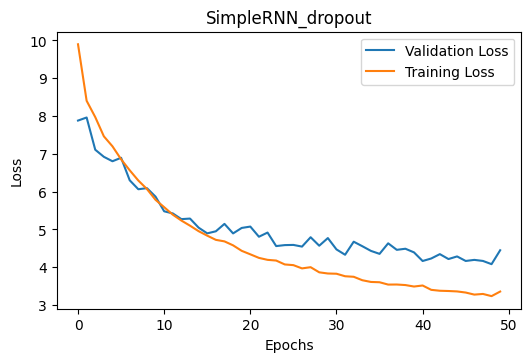

In [ ]:
# 모델 학습이 잘 되는지 테스트

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout, Input, Attention, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 로드
dataset = pd.read_csv('/content/drive/MyDrive/DA_dataset/infection_dataset_in_18hour.csv')
target = pd.read_csv('/content/drive/MyDrive/DA_dataset/infection_target_in_18hour.csv')
# stay_id와 los 연결
# dataset과 target의 stay_id 확인
dataset_stay_ids = dataset['stay_id'].unique()
target_stay_ids = target['stay_id'].unique()

# dataset의 stay_id가 target에 모두 포함되는지 확인
missing_stay_ids = set(dataset_stay_ids) - set(target_stay_ids)
print(f"Missing stay_ids in target: {len(missing_stay_ids)}")

# stay_id를 기준으로 병합
merged_dataset = pd.merge(dataset, target, on='stay_id', how='inner')

# 병합된 데이터 확인
print(f"Merged dataset shape: {merged_dataset.shape}")

# Feature와 Target 분리
X = merged_dataset.drop(columns=["stay_id", "los", "time_bin"])  # stay_id와 time_bin 제거
y = merged_dataset["los"]
# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# stay_id 및 los 컬럼 다시 추가
X_scaled_df['stay_id'] = merged_dataset['stay_id']
X_scaled_df['los'] = y

# 텐서 생성 함수
def create_tensor_by_stay_id(data, sequence_length):
    grouped = data.groupby('stay_id')
    X_list, y_list, stay_ids = [], [], []
    for stay_id, group in grouped:
        values = group.drop(columns=['stay_id']).values
        features = values[:, :-1]  # 피처
        los_values = values[:, -1]  # 타겟 값

        for i in range(len(features) - sequence_length + 1):
            X_list.append(features[i:i+sequence_length])
            y_list.append(los_values[i+sequence_length-1])
            stay_ids.append(stay_id)
    return np.array(X_list), np.array(y_list), stay_ids

# 시퀀스 길이
sequence_length = 9
X_tensor, y_tensor, stay_ids = create_tensor_by_stay_id(X_scaled_df, sequence_length)

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# 입력 데이터 형식
sequence_length = X_train.shape[1]
feature_dim = X_train.shape[2]
inputs = Input(shape=(sequence_length, feature_dim))

# 모델 생성 함수
def create_basic_model(rnn_layer):
    rnn_out = rnn_layer(64, activation='relu', return_sequences=False)(inputs)
    output = Dense(1)(rnn_out)
    return Model(inputs=inputs, outputs=output)

def create_attention_model(rnn_layer):
    rnn_out = rnn_layer(64, activation='relu', return_sequences=True)(inputs)
    query = Dense(32)(rnn_out)  # Attention 크기 감소
    key = Dense(32)(rnn_out)
    value = Dense(32)(rnn_out)
    attention_out = Attention()([query, key, value])
    attention_out = GlobalAveragePooling1D()(attention_out)
    output = Dense(1)(attention_out)
    return Model(inputs=inputs, outputs=output)

def create_dropout_model(rnn_layer):
    rnn_out = rnn_layer(64, activation='relu', return_sequences=False)(inputs)
    rnn_out = Dropout(0.3)(rnn_out)  # Dropout 비율 증가
    output = Dense(1)(rnn_out)
    return Model(inputs=inputs, outputs=output)

# 모델 정의 및 컴파일
rnn_layer_types = {'SimpleRNN':SimpleRNN}
models = {}

for layer_name, layer_type in rnn_layer_types.items():
    #models[f"{layer_name}_basic"] = create_basic_model(layer_type)
    #models[f"{layer_name}_attention"] = create_attention_model(layer_type)
    models[f"{layer_name}_dropout"] = create_dropout_model(layer_type)

for model in models.values():
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 평가 함수
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    y_test = y_test.flatten()
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    return mae, mse, rmse, r2


# 모델 학습 및 평가
histories = {}
evaluation_results = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    histories[model_name] = model.fit(
        X_train, y_train,
        epochs=50,  # Epoch 증가
        batch_size=32,
        validation_data=(X_test, y_test),
        verbose=1
    )
    # 모델 평가
    mae, mse, rmse, r2 = evaluate_model(model, X_test, y_test)
    evaluation_results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# 평가 결과 출력
evaluation_df = pd.DataFrame.from_dict(evaluation_results, orient='index')
evaluation_df.reset_index(inplace=True)
evaluation_df.columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2']
print("\nEvaluation Results:")
print(evaluation_df)

# 평가 결과 시각화
plt.figure(figsize=(15, 10))
for i, (model_name, history) in enumerate(histories.items()):
    plt.subplot(3, 3, i+1)
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title(model_name)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()
